In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
seed = 2020
import random
np.random.seed(seed)  # Numpy module.
random.seed(seed)  # Python random module.

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.close('all')


In [12]:
def preprocess(data):
    #将非数映射数字
    for title in data.columns:
        if data[title].dtype=='object':
            encoder = LabelEncoder()
            data[title] = encoder.fit_transform(data[title])         
    #去均值和方差归一化
    ss = StandardScaler()
    X = data.drop('好瓜',axis=1)
    Y = data['好瓜']
    X = ss.fit_transform(X)
    x,y = np.array(X),np.array(Y).reshape(Y.shape[0],1)
    return x,y


In [13]:
#定义Sigmoid 
def sigmoid(x):
    return 1/(1+np.exp(-x))
#求导
def d_sigmoid(x):
    return x*(1-x)


In [18]:
def standard_BP(x,y,dim=10,eta=0.8,max_iter=500): 
    n_samples = 1
    w1 = np.random.random((x.shape[1],dim))
    w2 = np.random.random((dim,1))
    b1 = np.random.random((n_samples,dim))
    b2 = np.random.random((n_samples,1))
    losslist = []
    for ite in range(max_iter):
        loss_per_ite = []
        for m in range(x.shape[0]):
            xi,yi = x[m,:],y[m,:]
            xi,yi = xi.reshape(1,xi.shape[0]),yi.reshape(1,yi.shape[0])
            ##补充前向传播代码   
            u1 = np.dot(xi, w1) + b1  # 隐层输入
            out1 = sigmoid(u1)         # 隐层输出
            u2 = np.dot(out1, w2) + b2 # 输出层输入
            out2 = sigmoid(u2)         # 最终输出
            loss = np.square(yi - out2).mean()/2  # 或直接取标量值
            loss_scalar = loss.item()  # 将数组转为标量
            loss_per_ite.append(loss_scalar)
            ##反向传播
            delta2 = (out2 - yi) * d_sigmoid(out2)
            delta1 = np.dot(delta2, w2.T) * d_sigmoid(out1)
            ##补充反向传播代码
            ##补充参数更新代码
            w2_grad = np.dot(out1.T, delta2)
            b2_grad = np.sum(delta2, axis=0, keepdims=True)
            w1_grad = np.dot(xi.T, delta1)
            b1_grad = np.sum(delta1, axis=0, keepdims=True)

            w2 -= eta * w2_grad
            b2 -= eta * b2_grad
            w1 -= eta * w1_grad
            b1 -= eta * b1_grad

            
            
        losslist.append(np.mean(loss_per_ite))
    ##Loss可视化
    plt.figure()
    plt.plot(range(max_iter), losslist)
    plt.xlabel('迭代次数')
    plt.ylabel('损失')
    plt.title('标准BP训练损失曲线')
    plt.show()
    return w1,w2,b1,b2


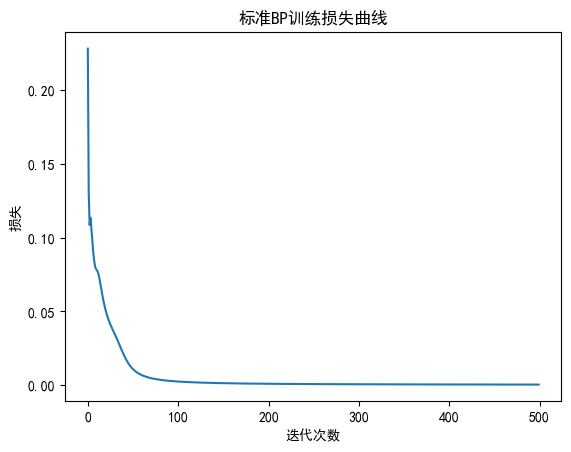

In [20]:
data = pd.read_table('watermelon30.txt',delimiter=',')
data.drop('编号',axis=1,inplace=True)
x,y = preprocess(data)
dim = 10
w1,w2,b1,b2 = standard_BP(x,y,dim)
#根据当前的x，预测其类别；
u1 = np.dot(x,w1)+b1
out1 = sigmoid(u1)
u2 = np.dot(out1,w2)+b2
out2 = sigmoid(u2)  
y_pred = np.round(out2)
result = pd.DataFrame(np.hstack((y,y_pred)),columns=['真值','预测'] )     

